# Description

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# Objective

* To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

# Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

## Data Dictionary

Sl_No: Primary key of the records
Customer Key: Customer identification number
Average Credit Limit: Average credit limit of each customer for all credit cards
Total credit cards: Total number of credit cards possessed by the customer
Total visits bank: Total number of visits that customer made (yearly) personally to the bank
Total visits online: Total number of visits or online logins made by the customer (yearly)
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
#!pip install yellowbrick
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization

import matplotlib.pylab as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# to scale the data using z-score

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# to compute distances

from scipy.spatial.distance import cdist

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_excel("Credit_Card_Customer_Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [4]:
data.shape  # Let's see the shape of the dataset

(660, 7)

<IPython.core.display.Javascript object>

The dataset originally has 660 rows and 7 columns

In [5]:
# Let's check the unique values of each feature and identify continuous variables
for col in data.columns:
    print(data[col].value_counts())
    print("-" * 100)

1      1
435    1
437    1
438    1
439    1
      ..
221    1
222    1
223    1
224    1
660    1
Name: Sl_No, Length: 660, dtype: int64
----------------------------------------------------------------------------------------------------
50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64
----------------------------------------------------------------------------------------------------
8000      35
6000      31
13000     28
9000      28
10000     26
19000     26
11000     24
7000      24
18000     23
17000     23
14000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
50000      8
38000      8
56000      7
39000      7
68000      7
41000      6
48000      6
47000      6
34000      6
30000      6
52000      6
37000      6
74000      6
26000      5
65000      5
60000      5
29000      5
31000      5
73000      4
49000      4

<IPython.core.display.Javascript object>

The features are numeric and continuous

In [6]:
data.info()  # Let's check the data information for null values, and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

All the features are of integer data type and appears there's no null value

In [7]:
data.isna().sum()  # Double check for missing numbers or null values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

No missing or null values

In [8]:
data.duplicated().sum()  # Check for duplicated entries

0

<IPython.core.display.Javascript object>

No duplicated observation

In [9]:
data.describe(include="all").T  # Let's check the distribution of the data

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

Sl_No and Customer Key are unique identifiers.
Mean is greater than median values for Avg_Credit_Limit, Total_visits_bank, Total_visits_online, and Total_calls_made. So, they appear right-skewed.
Mean is greater than median value for Total_Credit_Cards. So, it appears left-skewed.
There's a possibility of outliers for some features as their average values for 75% of customers is at least twice the maximum value: Avg_Credit_Limit, Total_visits_online, and Total_calls_made.

## Recall: Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

#### Sl_No and Customer Key would be dropped in this analyses as they are unique identification numbers of customers

In [10]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [11]:
data1 = data1.drop(columns=["Sl_No", "Customer Key"])

<IPython.core.display.Javascript object>

In [12]:
data1.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

Avg_Credit_Limit and Total_visits_online seem to have outliers as their average values for 75% of the customers are almost four times less than the maximum values for those features

In [13]:
data1[
    data1.Total_visits_online > 4
].describe().T  # Let's check whether there are outliers for Total_visits_online

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,105.0,73876.190476,68724.463123,5000.0,11000.0,20000.0,144000.0,200000.0
Total_Credit_Cards,105.0,5.361905,3.430978,1.0,2.0,4.0,9.0,10.0
Total_visits_bank,105.0,0.780952,0.664787,0.0,0.0,1.0,1.0,2.0
Total_visits_online,105.0,7.857143,3.555680,5.0,5.0,5.0,11.0,15.0
Total_calls_made,105.0,4.219048,3.365495,0.0,1.0,4.0,7.0,10.0


<IPython.core.display.Javascript object>

The distribution of the Total_visits_online appears fair enough and seem to be a unique data set for 105 customers. So, they are not outliers as the number of customers in that category are large.

In [14]:
data1[
    data1.Total_visits_online > 8
].describe().T  # Let's check whether there are outliers for Total_visits_online

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,37.0,139945.945946,38128.398534,50000.0,100000.0,145000.0,172000.0,200000.0
Total_Credit_Cards,37.0,8.675676,1.633912,3.0,8.0,9.0,10.0,10.0
Total_visits_bank,37.0,0.567568,0.502247,0.0,0.0,1.0,1.0,1.0
Total_visits_online,37.0,12.216216,2.123089,9.0,10.0,12.0,15.0,15.0
Total_calls_made,37.0,1.378378,1.569702,0.0,0.0,1.0,2.0,9.0


<IPython.core.display.Javascript object>

The distribution of the Total_visits_online appears fair enough and seem to be a unique data set for 37 customers. So, they are not outliers as the number of customers in that category are large.

In [15]:
data1[data1.Avg_Credit_Limit > 48000].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,164.0,86506.097561,41501.791956,49000.0,59000.0,69000.0,100000.00,200000.0
Total_Credit_Cards,164.0,6.487805,1.932886,2.0,5.0,6.0,7.25,10.0
Total_visits_bank,164.0,2.414634,1.570051,0.0,1.0,2.0,4.00,5.0
Total_visits_online,164.0,4.006098,4.949434,0.0,0.0,2.0,8.00,15.0
Total_calls_made,164.0,1.768293,1.484470,0.0,0.0,2.0,3.00,9.0


<IPython.core.display.Javascript object>

The distribution of the Avg_Credit_Limit appears fair enough and seem to be a unique data set for 164 customers. So, they are not outliers as the number of customers in that category are large.

In [16]:
data1[data1.Avg_Credit_Limit > 100000].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,39.0,154205.128205,26715.045522,106000.0,131500.0,157000.0,172500.0,200000.0
Total_Credit_Cards,39.0,8.743590,1.140590,7.0,8.0,9.0,10.0,10.0
Total_visits_bank,39.0,0.589744,0.498310,0.0,0.0,1.0,1.0,1.0
Total_visits_online,39.0,10.871795,2.948501,7.0,8.0,11.0,13.0,15.0
Total_calls_made,39.0,1.000000,0.827170,0.0,0.0,1.0,2.0,2.0


<IPython.core.display.Javascript object>

The distribution of the Avg_Credit_Limit appears fair enough and seem to be a unique data set for 39 customers. So, they are not outliers as the number of customers in that category are large.

# Let's carry out some univariate data analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(ascending=True),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

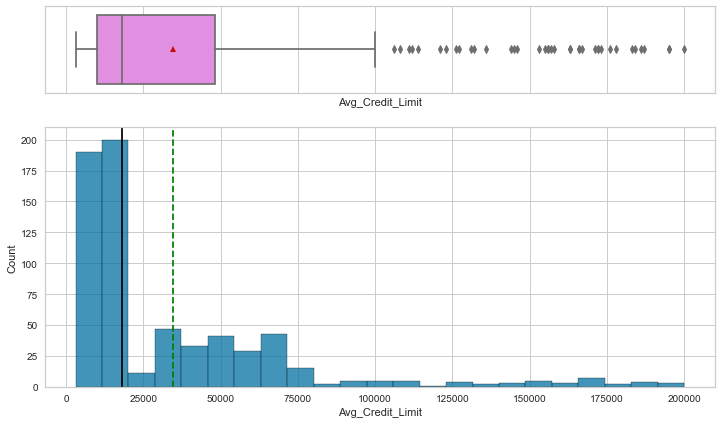

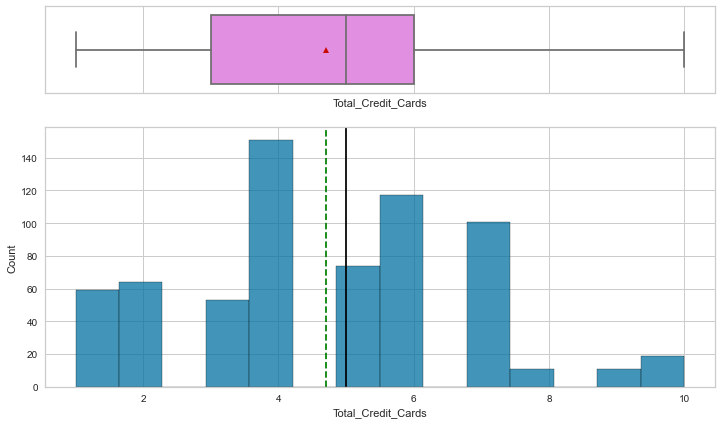

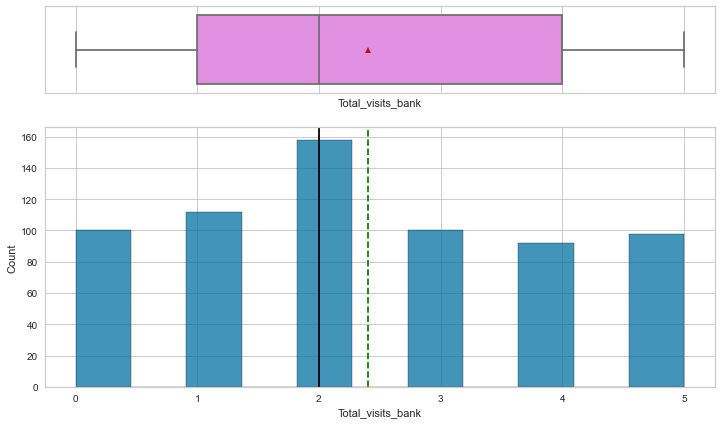

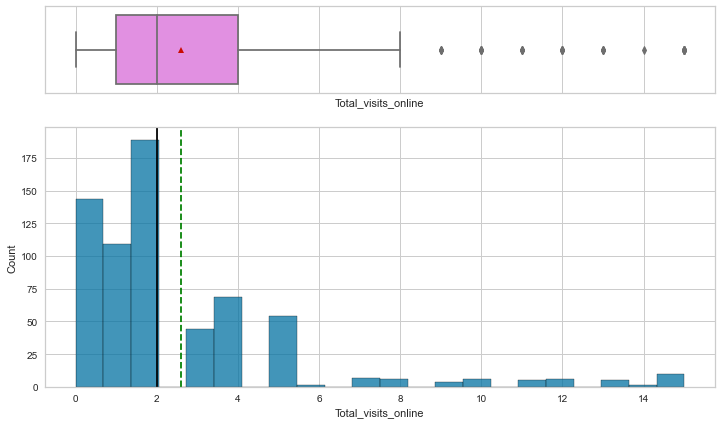

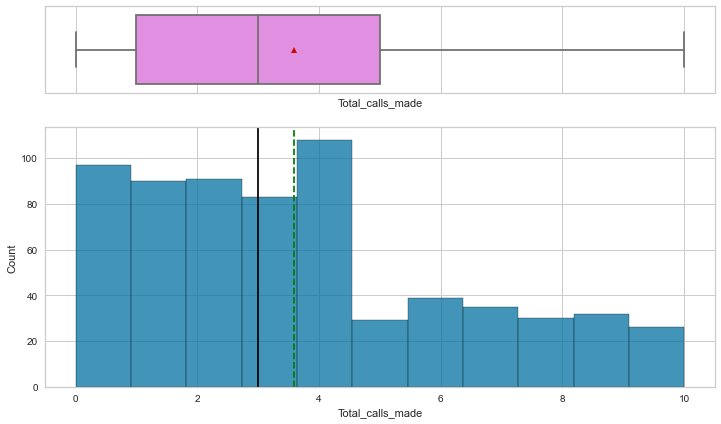

<IPython.core.display.Javascript object>

In [19]:
for i in data1.columns:
    histogram_boxplot(data1, i)

Mean is greater than median values for Avg_Credit_Limit, Total_visits_bank, Total_visits_online, and Total_calls_made. So, they appear right-skewed.
Mean is greater than median value for Total_Credit_Cards. So, it appears left-skewed.
There's a possibility of outliers for Avg_Credit_Limit above 100000.
There's a possibility of outliers for Total_visits_online above 8.

# Outlier treatment

In [20]:
data1[data1.Avg_Credit_Limit > 100000].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,39.0,154205.128205,26715.045522,106000.0,131500.0,157000.0,172500.0,200000.0
Total_Credit_Cards,39.0,8.743590,1.140590,7.0,8.0,9.0,10.0,10.0
Total_visits_bank,39.0,0.589744,0.498310,0.0,0.0,1.0,1.0,1.0
Total_visits_online,39.0,10.871795,2.948501,7.0,8.0,11.0,13.0,15.0
Total_calls_made,39.0,1.000000,0.827170,0.0,0.0,1.0,2.0,2.0


<IPython.core.display.Javascript object>

The distribution of the Avg_Credit_Limit above 100000 appears fair enough and seem to be a unique data set for 39 customers. So, they are not outliers as the number of customers in that category are large.

In [21]:
data1[
    data1.Total_visits_online > 8
].describe().T  # Let's check whether there are outliers for Total_visits_online

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,37.0,139945.945946,38128.398534,50000.0,100000.0,145000.0,172000.0,200000.0
Total_Credit_Cards,37.0,8.675676,1.633912,3.0,8.0,9.0,10.0,10.0
Total_visits_bank,37.0,0.567568,0.502247,0.0,0.0,1.0,1.0,1.0
Total_visits_online,37.0,12.216216,2.123089,9.0,10.0,12.0,15.0,15.0
Total_calls_made,37.0,1.378378,1.569702,0.0,0.0,1.0,2.0,9.0


<IPython.core.display.Javascript object>

The distribution of the Total_visits_online above 8 appears fair enough and seem to be a unique data set for 37 customers. So, they are not outliers as the number of customers in that category are large.

# Lets check the bar plots for each feature

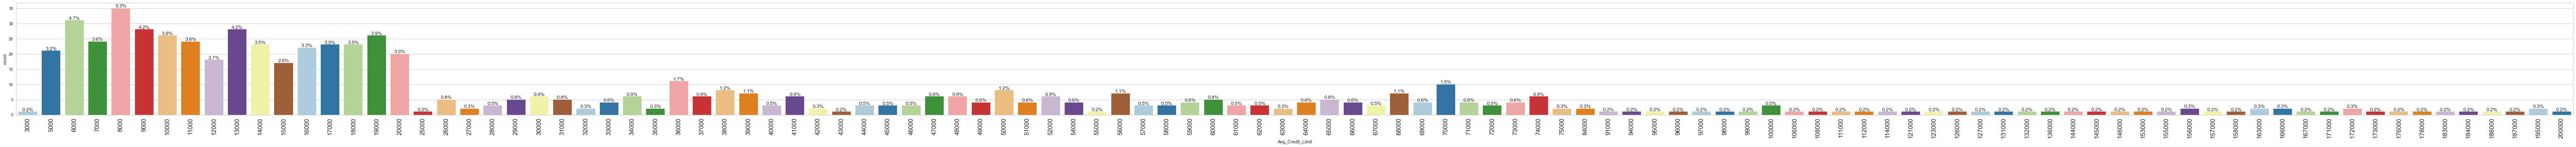

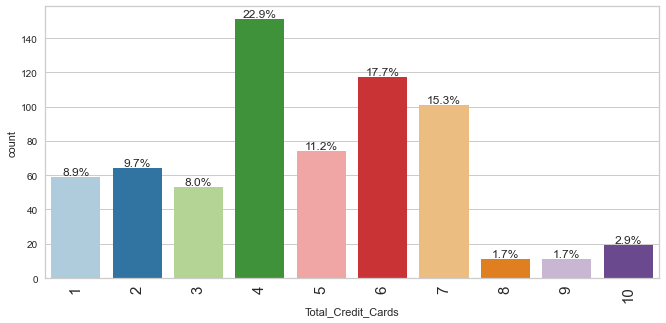

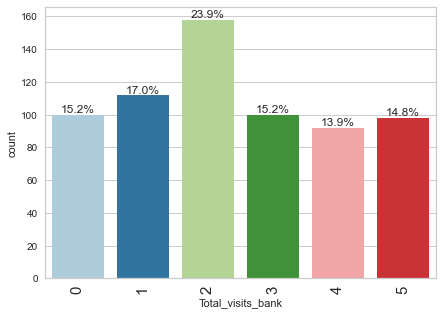

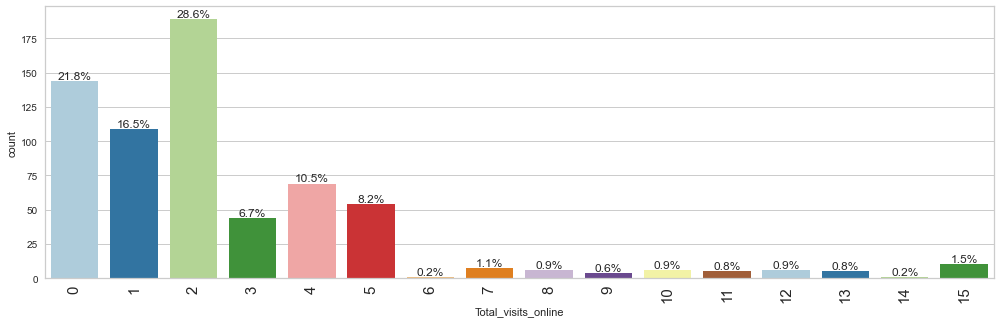

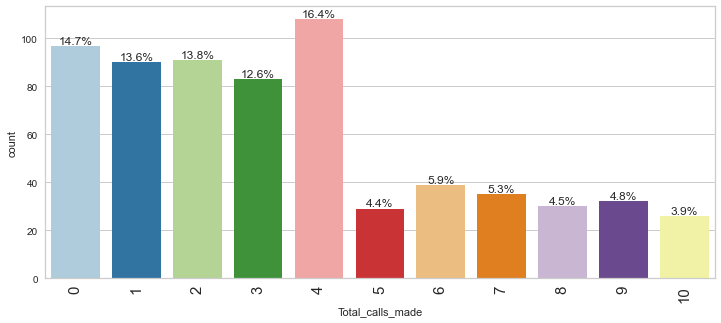

<IPython.core.display.Javascript object>

In [22]:
for i in data1.columns:
    labeled_barplot(data1, i, perc=True)

Most of the customers have 4 credit cards (22.9%).
Most of the customers have visited the bank 2 times (23.9%).
Most of the customers have visited online 2 times (28.6%).
Most of the customers have made calls to the bank 4 times (16.4%). 

In [23]:
# selecting numerical columns
num_col = data1.select_dtypes(include=np.number).columns.tolist()


<IPython.core.display.Javascript object>

### CDF plot to confirm distribution of the data

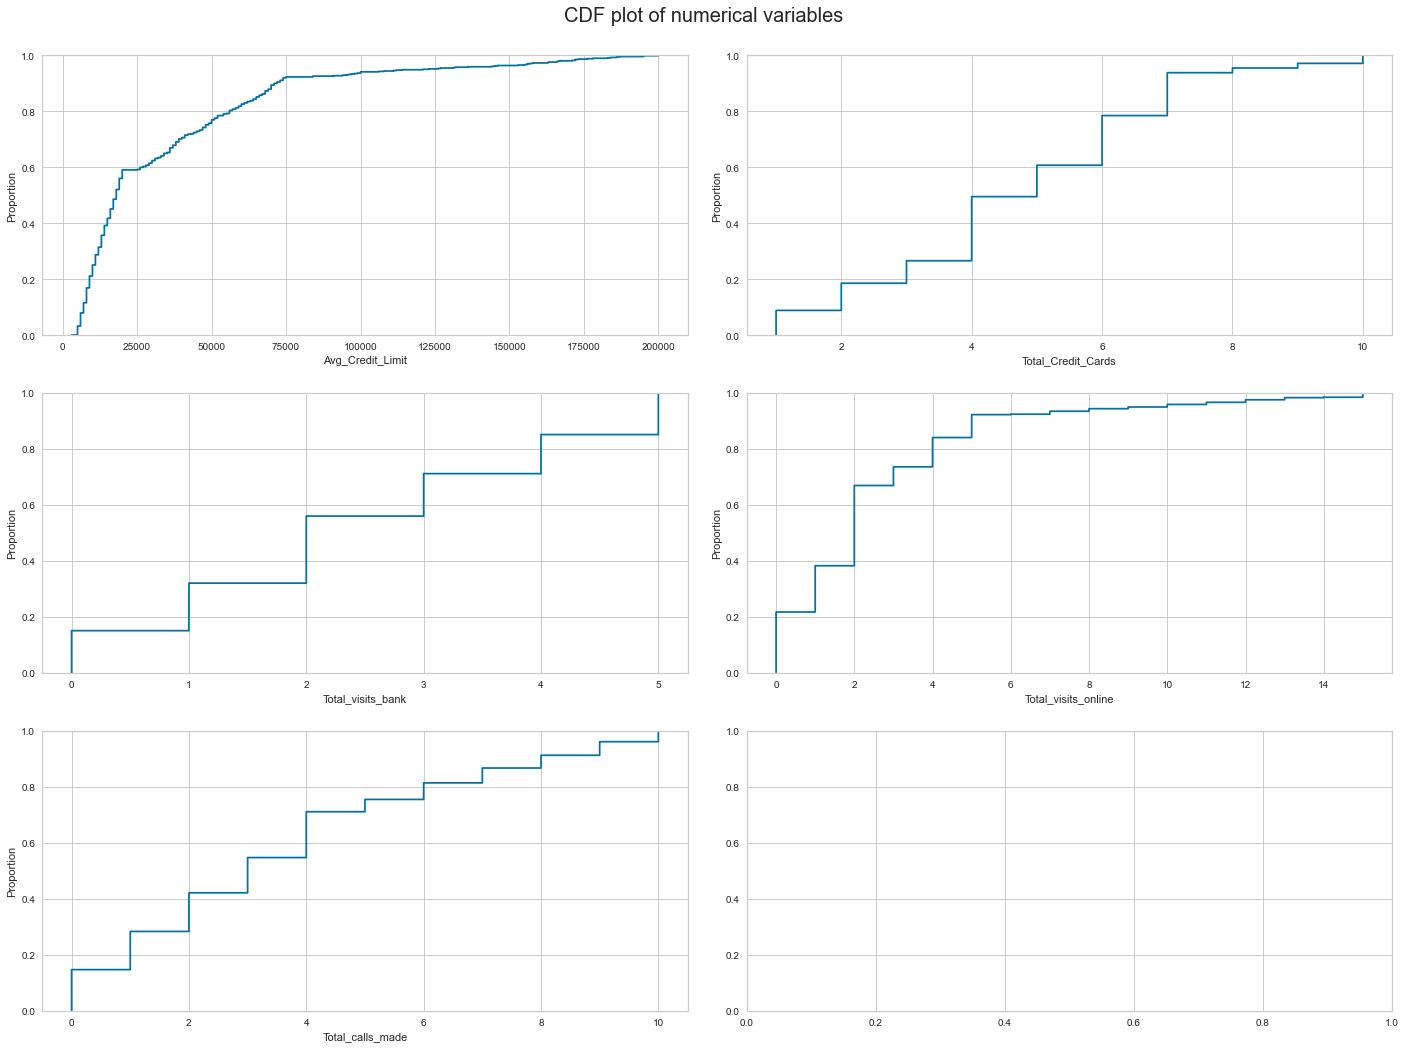

<IPython.core.display.Javascript object>

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data1[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data1[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

- At least 50% of the customers have average credit limit of 20000.
- At least 50% of the customers have 4 to 5 total credit cards.
- At least 50% of the customers visit the bank 2 times yearly.
- At least 50% of the customers access the bank online 2 times yearly.
- At least 50% of the customers make calls to the bank 3 times yearly.

In [25]:
data1.describe(include="all")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


<IPython.core.display.Javascript object>

# Bivariate Analysis

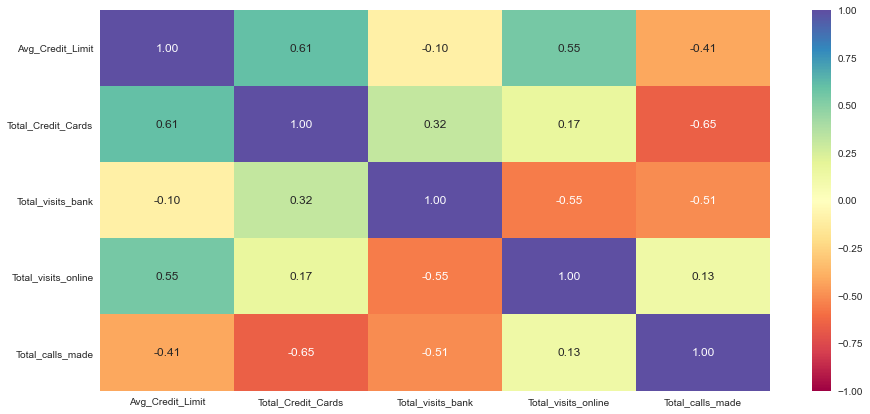

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Positive correlation between Average credit limit and Total credit cards, Total visits online. So, the higher average credit limit, the more total credit cards and total visits online.
* There is a negative correlation between total credit cards and total calls made. The higher total credit cards the less calls made as there are alternative credit cards to use and less need to call.
* There is a negative correlation between total visits bank and total visits online, total calls made. The more physical visits to the bank, the less online or phone communications.

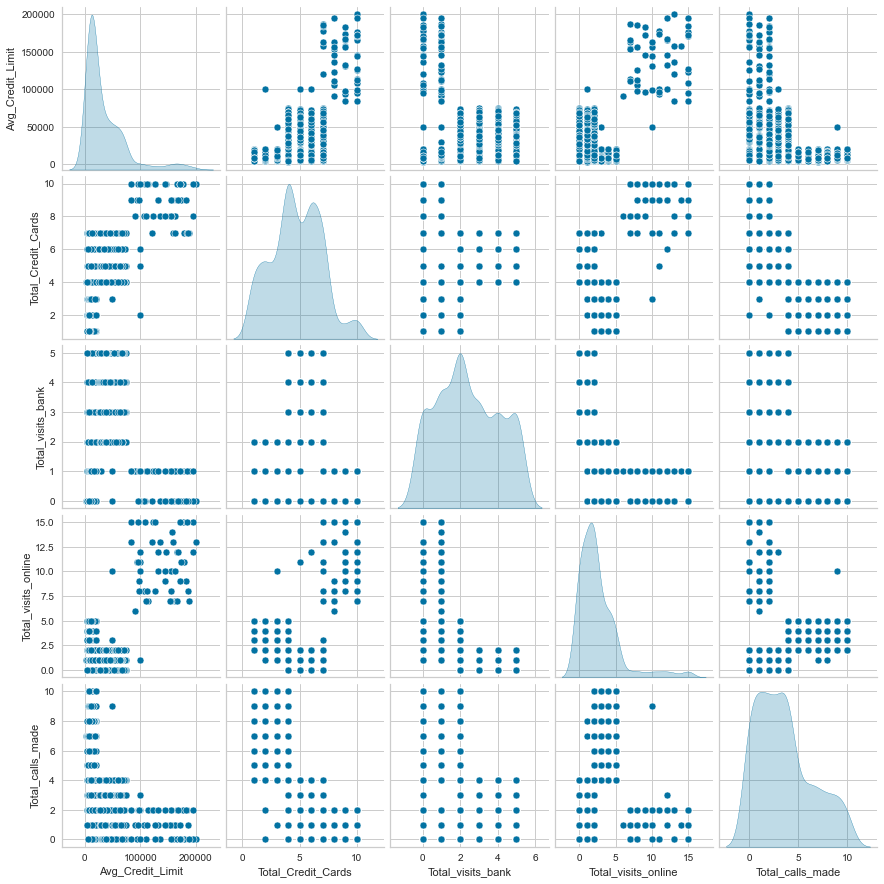

<IPython.core.display.Javascript object>

In [27]:
# To confirm the correlation, let's make a pairplot

sns.pairplot(data=data1[num_col], diag_kind="kde")
plt.show()

* ALl the features are skewed.
* Positive correlation between Average credit limit and Total credit cards, Total visits online. So, the higher average credit limit, the more total credit cards and total visits online.
* There is a negative correlation between total credit cards and total calls made. The higher total credit cards the less calls made as there are alternative credit cards to use and less need to call.
* There is a negative correlation between total visits bank and total visits online, total calls made. The more physical visits to the bank, the less online or phone communications.

In [28]:
data3 = data1.copy()  # For version control

<IPython.core.display.Javascript object>

In [29]:
# checking for missing values

data1.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

In [30]:
data1  # Double check the data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


<IPython.core.display.Javascript object>

In [31]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data1[num_col].copy()
subset_scaled = scaler.fit_transform(subset)


<IPython.core.display.Javascript object>

In [32]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [33]:
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


<IPython.core.display.Javascript object>

# K-Means Clustering

C:\Users\amina\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9429882588535909
Number of Clusters: 7 	Average Distortion: 0.9095522652124278
Number of Clusters: 8 	Average Distortion: 0.889432102400773


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

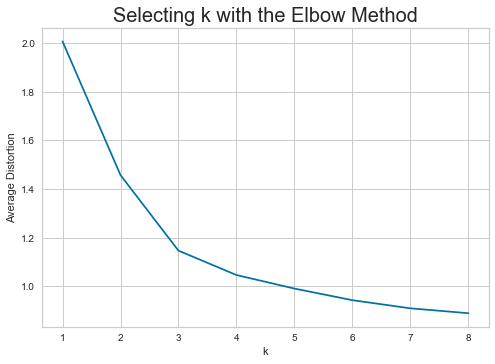

<IPython.core.display.Javascript object>

In [34]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

Elbows are observed at 2, 3, 4, 5, 6, and 7.

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.41842496663230405
For n_clusters = 3, silhouette score is 0.5157182558882754
For n_clusters = 4, silhouette score is 0.355667061937737
For n_clusters = 5, silhouette score is 0.272689879182253
For n_clusters = 6, silhouette score is 0.25545029453735185
For n_clusters = 7, silhouette score is 0.24841961814887856
For n_clusters = 8, silhouette score is 0.22739060139680822
For n_clusters = 9, silhouette score is 0.21446809069409484


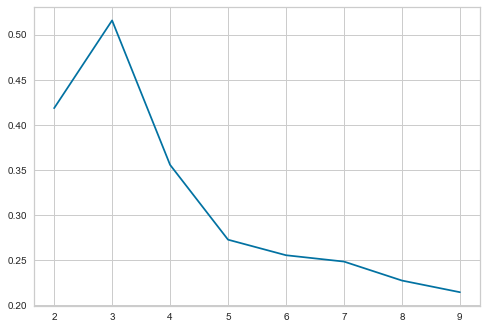

<IPython.core.display.Javascript object>

In [35]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 3 is a good value of k.**

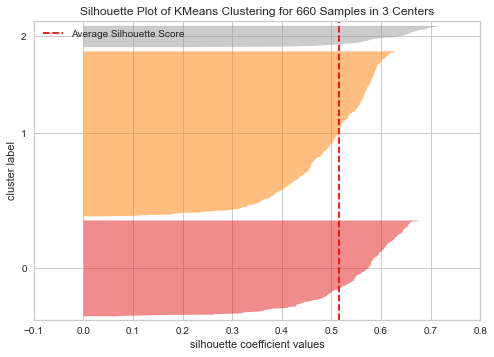

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3))
visualizer.fit(subset_scaled_df)
visualizer.show()

For 3 clusters we have Silhouette score above 0.5 and observations in each clusters are large and have good variance

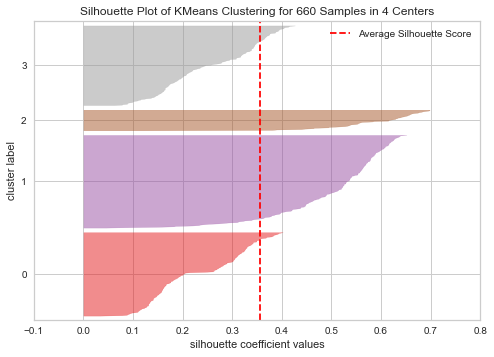

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4))
visualizer.fit(subset_scaled_df)
visualizer.show()

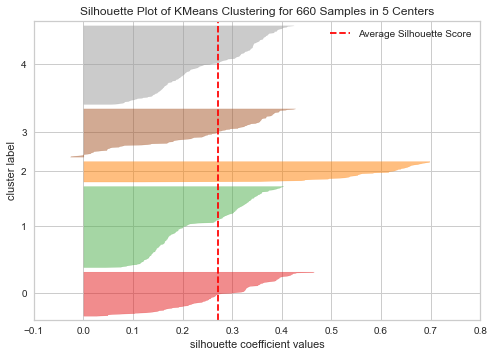

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [38]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5))
visualizer.fit(subset_scaled_df)
visualizer.show()

For 4 and 5 clusters we have low Silhouette scores and observations in each clusters are not large and have poor variance.

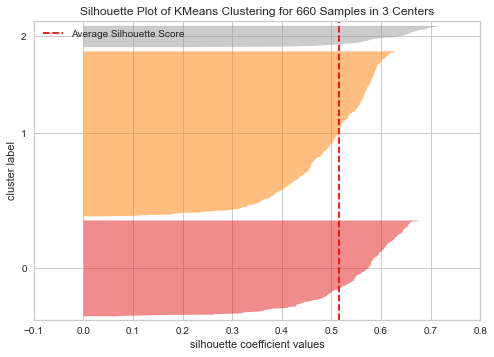

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

Good Silhouette coefficient and good variability of clusters

**Let's take 3 as the appropriate no. of clusters(K) as the silhouette score is high enough for all the 3-clusters(above average silhouette score), and there is a knick at 3 in the elbow curve.**

In [40]:
data2 = data1.copy()  # For version control

<IPython.core.display.Javascript object>

In [41]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [42]:
# adding kmeans cluster labels to the original dataframe
data1["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling - K-Means

In [43]:
cluster_profile = data1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [44]:
cluster_profile["count_in_each_segment"] = (
    data1.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

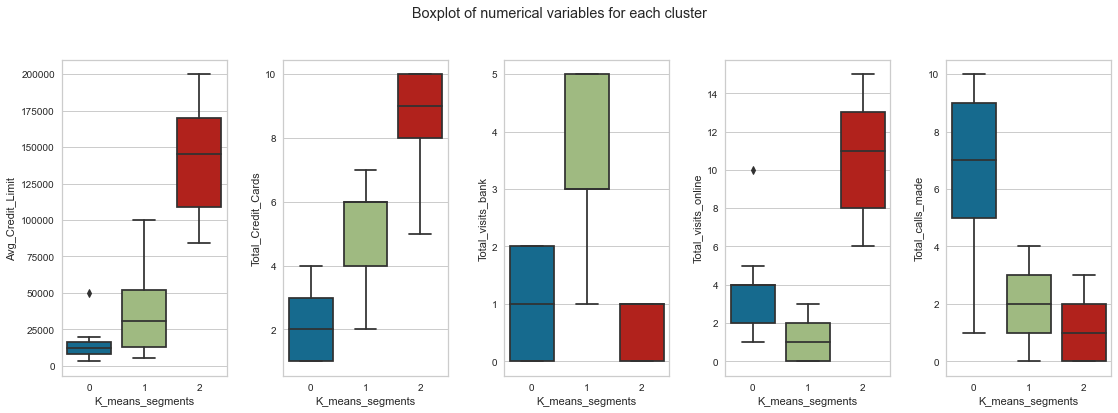

<IPython.core.display.Javascript object>

In [45]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data1[num_col[counter]], x=data1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Cluster 0**
* Average credit limit below 25000 (median: 12500) - So, low average credit limit.
* Total credit cards between 1 and 4 (median: 2) - Low number of credit cards.
* Total physical visits to bank between 0 and 2 (median: 1)- Low physical visit to the bank.
* Total visits online between 1 and 5 (median: 2-4) - Moderate online visits.
* Total calls made between 1 and 10 (median: 7) - High amount of calls made.

* Appears to be customers that are busy in their workplace and hardly visits the bank. More like low income employees in the office mostly kept busy by their bosses, while the bosses might be free to go out as many times as they want. This set of customers are proficient with the IT and online interaction. 

**Cluster 1**
* Average credit limit between 5000 and 100000 (median: 30000) - Moderate.
* Total credit cards between 2 and 7 (median: 4 - 6) - Moderate.
* Total physical visits to bank between 1 and 5 (median: 3 - 5 ) - High.
* Total visits online between 0 and 3 (median: 1) - Low.
* Total calls made between 0 and 4 (median: 2) - Low.

* Appears to be customers that have the flexibility to visit the bank physically. These set are not very proficient with online interaction and IT. So, they prefer to visit the bank probably by taking excuses from the office once in a while. They could be the bosses in the office, engaging their junior colleagues in the office while they step out to the bank.

**Cluster 2**
* Average credit limit between 80000 and 200000 (median: 145000) - High.
* Total credit cards between 5 and 10 (median: 9) - High.
* Total physical visits to bank between 0 and 1 (median: 0 - 1) - Low.
* Total visits online between 6 and 15 (median: 11) - High.
* Total calls made between 0 and 3 (median: 1) - Low.

* Appears to be customers that have high credit limit. This set is very proficient with online interaction and IT. So, they hardly visit the bank physically or call. Instead, most of their interations are done online by logging into their accounts. They are probably self-employed and busy in their office developing products and services. They could also be customers that have good jobs abroad and within a different time zone. So, they prefer to login or chat the bank online.

Cluster 0 has high total calls made yearly.
Cluster 1 has high physical visits to the bank yearly.
Cluster 2 has high average credit limit, high number of credit cards, and high total visits online yearly. 

In [46]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

**The highlighted values on the average confirm that:**
* Cluster 0 has high total calls made yearly.
* Cluster 1 has high physical visits to the bank yearly.
* Cluster 2 has high average credit limit, high number of credit cards, and high total visits online yearly. 

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [47]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

In [48]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.8316306088851668

<IPython.core.display.Javascript object>

- The first two principal components explain 83% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

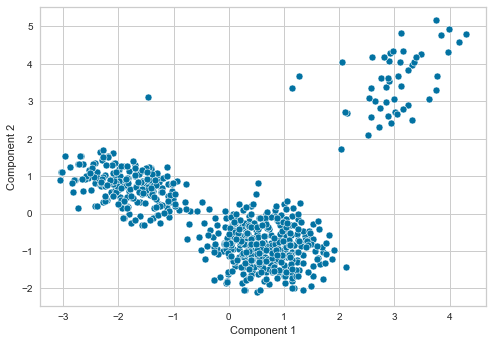

<IPython.core.display.Javascript object>

In [49]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

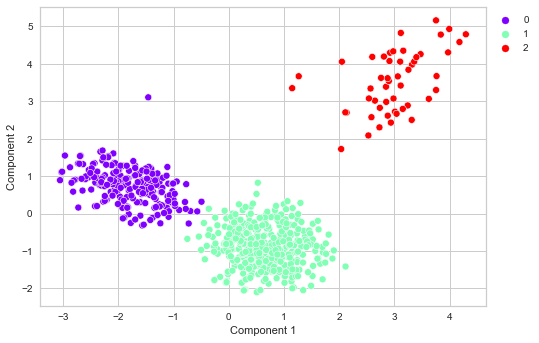

<IPython.core.display.Javascript object>

In [50]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data1["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

In [51]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

* There are 224 observations in Cluster 0.
* There are 386 observations in Cluster 1.
* There are 50 observations in Cluster 2.

In [52]:
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


<IPython.core.display.Javascript object>

# Hierarchical Clustering

In [53]:
subset_scaled_df_2 = subset_scaled_df.copy()  # For version control

<IPython.core.display.Javascript object>

In [54]:
subset_scaled_df_3 = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [55]:
#!pip install yellowbrick

import pandas as pd
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

from scipy.spatial.distance import cdist

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [56]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df_2, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df_2))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.666353446387536.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic cor

<IPython.core.display.Javascript object>

In [57]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

In [58]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df_2, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df_2))
    print(
        "Cophenetic correlation for {} linkage is {} with Euclidean distance.".format(
            lm, c
        )
    )
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552 with Euclidean distance.
Cophenetic correlation for complete linkage is 0.8599730607972423 with Euclidean distance.
Cophenetic correlation for average linkage is 0.8977080867389372 with Euclidean distance.
Cophenetic correlation for centroid linkage is 0.8939385846326323 with Euclidean distance.
Cophenetic correlation for ward linkage is 0.7415156284827493 with Euclidean distance.
Cophenetic correlation for weighted linkage is 0.8861746814895477 with Euclidean distance.


<IPython.core.display.Javascript object>

In [59]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage for Euclidean distance.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage for Euclidean distance.


<IPython.core.display.Javascript object>

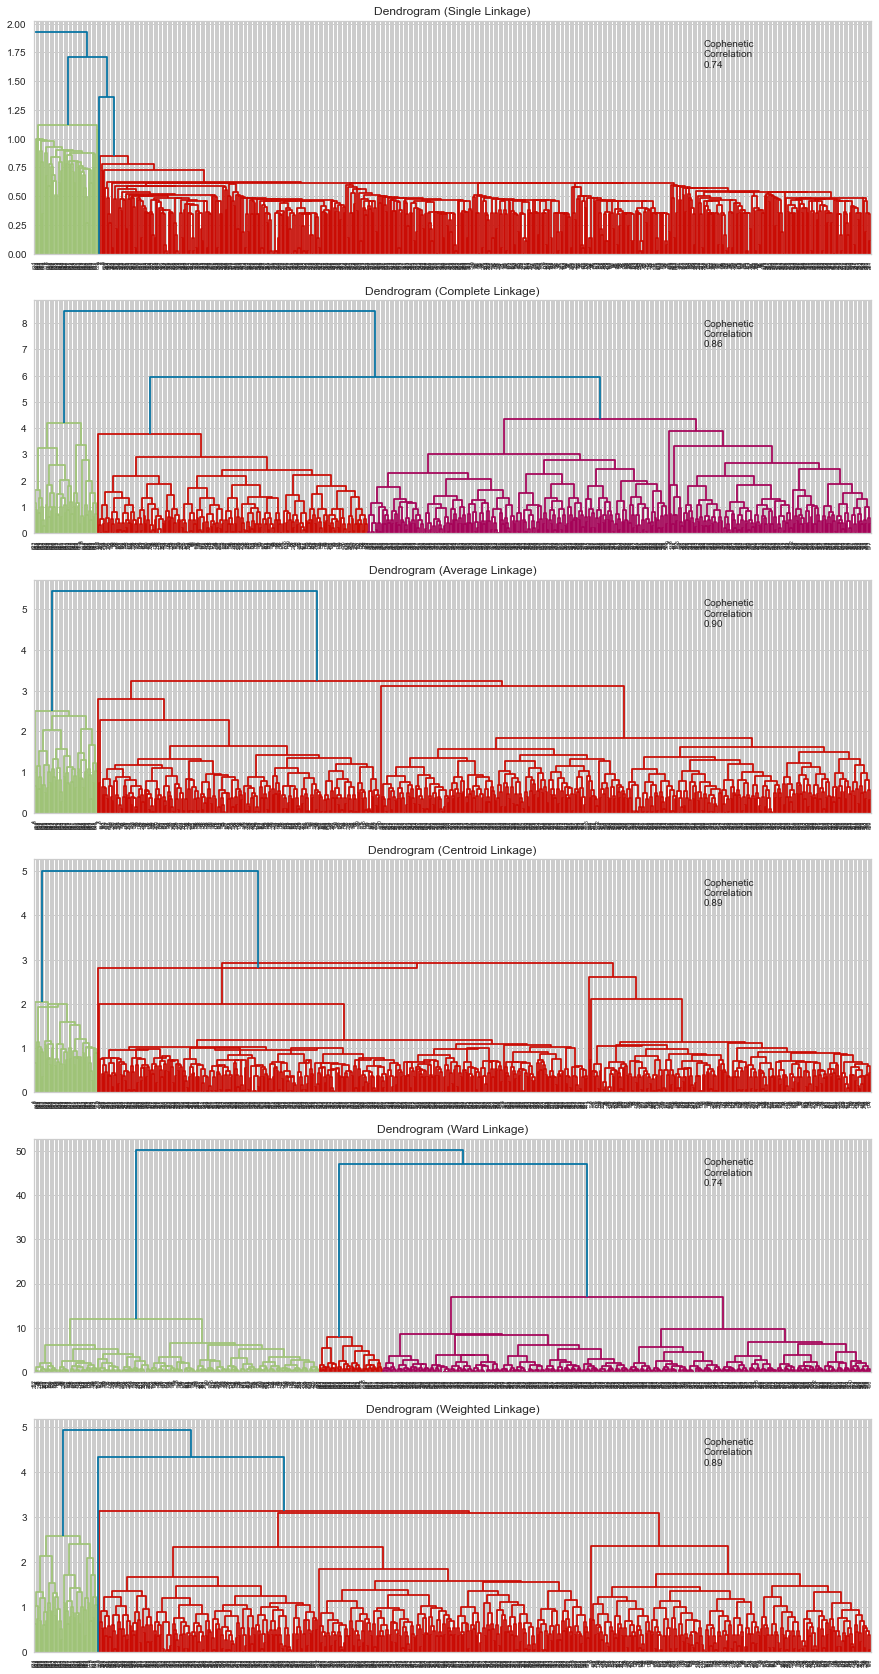

<IPython.core.display.Javascript object>

In [60]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df_2, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df_2))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Complete linkage (c=0.86) and Ward linkage (0.74) give a clear distinction of the clusters with colour coding. The optimum number of clusters based on these linkages is 3.

In [61]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df_2)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [62]:
# subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data2["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [63]:
cluster_profile2 = data2.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [64]:
data2.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'HC_Clusters'],
      dtype='object')

<IPython.core.display.Javascript object>

In [65]:
cluster_profile2["count_in_each_segments"] = (
    data2.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [66]:
# lets display cluster profile
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

Similar clusters, but their labels are changed.

In [67]:
data2["HC_Clusters"] = data2["HC_Clusters"].replace(
    {0: 1, 1: 0}
)  # Let's re-label the clusters to match the K-Means'

<IPython.core.display.Javascript object>

In [68]:
cluster_profile2_2 = data2.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [69]:
cluster_profile2_2["count_in_each_segments"] = (
    data2.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [70]:
cluster_profile2_2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,225
1,33851.948052,5.516883,3.493506,0.979221,1.994805,385
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

Now the 3 clusters are similar to the K-Means'.

In [71]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

**K-Means**
* There are 224 observations in Cluster 0.
* There are 386 observations in Cluster 1.
* There are 50 observations in Cluster 2.

**Hierarchical**
* There are 225 observations in Cluster 0.
* There are 385 observations in Cluster 1.
* There are 50 observations in Cluster 2.

**The only difference is that an observation in cluster 1 for K-Means was assigned to Cluster 0 in Hierarchical clustering**

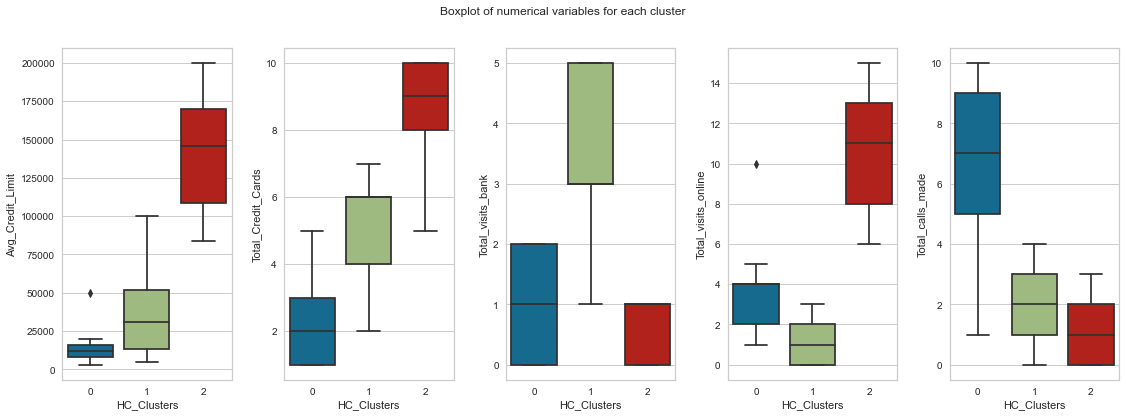

<IPython.core.display.Javascript object>

In [72]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data2[num_col[counter]], x=data2["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Cluster 0**
* Average credit limit below 25000 (median: 12500) - So, low average credit limit.
* Total credit cards between 1 and 4 (median: 2) - Low number of credit cards.
* Total physical visits to bank between 0 and 2 (median: 1)- Low physical visit to the bank.
* Total visits online between 1 and 5 (median: 2-4) - Moderate online visits.
* Total calls made between 1 and 10 (median: 7) - High amount of calls made.

* Appears to be customers that are busy in their workplace and hardly visits the bank. More like low income employees in the office mostly kept busy by their bosses, while the bosses might be free to go out as many times as they want. This set of customers are proficient with the IT and online interaction. 

**Cluster 1**
* Average credit limit between 5000 and 100000 (median: 30000) - Moderate.
* Total credit cards between 2 and 7 (median: 4 - 6) - Moderate.
* Total physical visits to bank between 1 and 5 (median: 3 - 5 ) - High.
* Total visits online between 0 and 3 (median: 1) - Low.
* Total calls made between 0 and 4 (median: 2) - Low.

* Appears to be customers that have the flexibility to visit the bank physically. These set are not very proficient with online interaction and IT. So, they prefer to visit the bank probably by taking excuses from the office once in a while. They could be the bosses in the office, engaging their junior colleagues in the office while they step out to the bank.

**Cluster 2**
* Average credit limit between 80000 and 200000 (median: 145000) - High.
* Total credit cards between 5 and 10 (median: 9) - High.
* Total physical visits to bank between 0 and 1 (median: 0 - 1) - Low.
* Total visits online between 6 and 15 (median: 11) - High.
* Total calls made between 0 and 3 (median: 1) - Low.

* Appears to be customers that have high credit limit. This set is very proficient with online interaction and IT. So, they hardly visit the bank physically or call. Instead, most of their interations are done online by logging into their accounts. They are probably self-employed and busy in their office developing products and services. They could also be customers that have good jobs abroad and within a different time zone. So, they prefer to login or chat the bank online.

**The highlighted values on the average confirm that:**
* Cluster 0 has high total calls made yearly.
* Cluster 1 has high physical visits to the bank yearly.
* Cluster 2 has high average credit limit, high number of credit cards, and high total visits online yearly. 

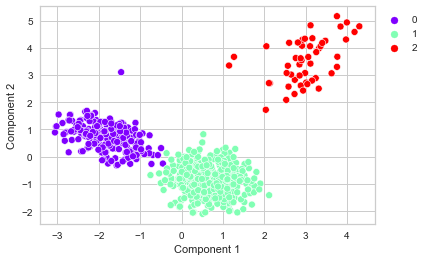

<IPython.core.display.Javascript object>

In [73]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data2["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

### Let's visualise for a 'complete' linkage

In [74]:
HCmodel_3 = AgglomerativeClustering(
    n_clusters=3, affinity="euclidean", linkage="complete"
)
HCmodel_3.fit(subset_scaled_df_3)

AgglomerativeClustering(linkage='complete', n_clusters=3)

<IPython.core.display.Javascript object>

In [75]:
# subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data3["HC_Clusters_Complete"] = HCmodel_3.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [76]:
cluster_profile3 = data3.groupby("HC_Clusters_Complete").mean()

<IPython.core.display.Javascript object>

In [77]:
cluster_profile3["count_in_each_segments"] = (
    data3.groupby("HC_Clusters_Complete")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [78]:
# lets display cluster profile
cluster_profile3.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters_Complete,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


<IPython.core.display.Javascript object>

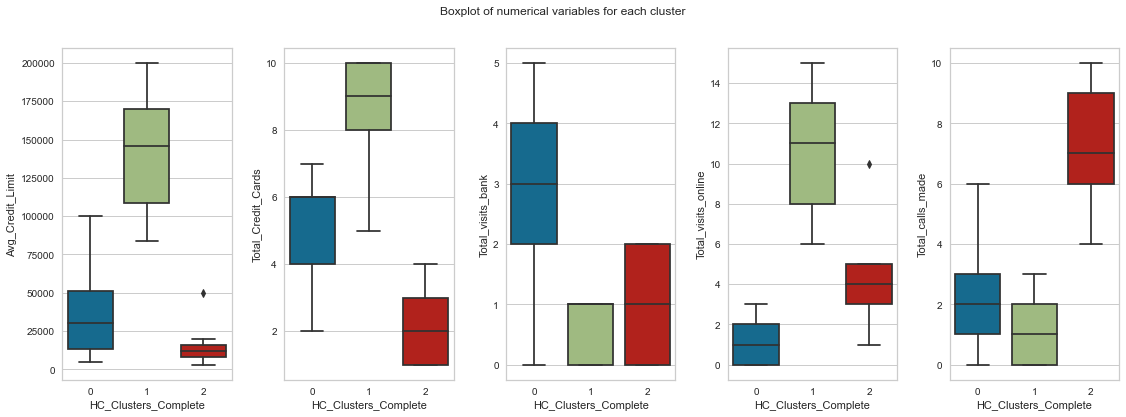

<IPython.core.display.Javascript object>

In [79]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data3[num_col[counter]], x=data3["HC_Clusters_Complete"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [80]:
# lets display cluster profile
cluster_profile3.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters_Complete,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


<IPython.core.display.Javascript object>

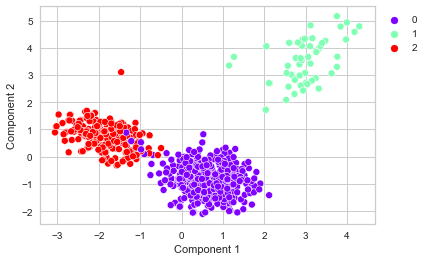

<IPython.core.display.Javascript object>

In [81]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data3["HC_Clusters_Complete"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

**For Complete linkage the observations are encroaching other clusters. So, we keep to the Ward linkage.**

# Comparing K-Means and Hierarchical Clustering

In [82]:
data_cluster = data.copy()

<IPython.core.display.Javascript object>

In [83]:
data_cluster["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [84]:
data_cluster["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [85]:
data_cluster["HC_Clusters"] = data_cluster["HC_Clusters"].replace(
    {0: 1, 1: 0}
)  # To re-label the Hierarchical clussters aptly.

<IPython.core.display.Javascript object>

In [86]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

<IPython.core.display.Javascript object>

In [87]:
data_cluster

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters
0,1,87073,100000,2,1,1,0,1,1
1,2,38414,50000,3,0,10,9,0,0
2,3,17341,50000,7,1,3,4,1,1
3,4,40496,30000,5,1,1,4,1,1
4,5,47437,100000,6,0,12,3,2,2
5,6,58634,20000,3,0,1,8,0,0
6,7,48370,100000,5,0,11,2,2,2
7,8,37376,15000,3,0,1,1,0,0
8,9,82490,5000,2,0,2,2,0,0
9,10,44770,3000,4,0,1,7,0,0


<IPython.core.display.Javascript object>

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score

data1["K_means_segments"] = kmeans.labels_
K_means_segments = data1["K_means_segments"]
# data_cluster["HC_Clusters"] = HCmodel.labels_
HC_Clusters = data_cluster["HC_Clusters"]
cm = confusion_matrix(K_means_segments, HC_Clusters)
print(cm)
print("\n")
print("Accuracy = ", round(accuracy_score(K_means_segments, HC_Clusters) * 100, 2), "%")

[[224   0   0]
 [  1 385   0]
 [  0   0  50]]


Accuracy =  99.85 %


<IPython.core.display.Javascript object>

**K-Means**
* There are 224 observations in Cluster 0.
* There are 386 observations in Cluster 1.
* There are 50 observations in Cluster 2.

**Hierarchical**
* There are 225 observations in Cluster 0.
* There are 385 observations in Cluster 1.
* There are 50 observations in Cluster 2.

**The only difference is that an observation in cluster 1 for K-Means was assigned to Cluster 0 in Hierarchical clustering**

In [89]:
def confusion_matrix_piped(real_target, pred_target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    cm = confusion_matrix(real_target, pred_target)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3, 3)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    # sns.heatmap(cm, annot=labels, fmt="", cmap="Spectral")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

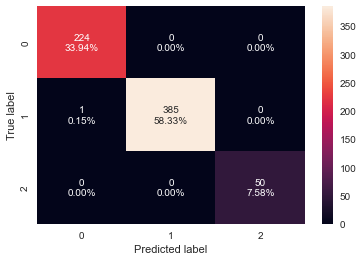

<IPython.core.display.Javascript object>

In [90]:
confusion_matrix_piped(K_means_segments, HC_Clusters)

In [91]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<IPython.core.display.Javascript object>

# Let's create a new dataframe to test our clusters

In [92]:
import pandas as pd

df_trial = pd.DataFrame(
    {
        "Avg_Credit_Limit": [
            65000,
            30000,
            80000,
            12000,
            60000,
            67000,
            3000,
            23000,
            45000,
            100000,
            20300,
            1000,
            500,
        ],
        "Total_Credit_Cards": [7, 9, 2, 5, 4, 6, 8, 3, 5, 9, 7, 1, 2],
        "Total_visits_bank": [3, 6, 9, 3, 5, 4, 6, 5, 8, 1, 4, 1, 2],
        "Total_visits_online": [2, 1, 10, 1, 5, 4, 6, 4, 3, 6, 8, 3, 4],
        "Total_calls_made": [3, 6, 8, 2, 5, 4, 6, 5, 9, 10, 2, 8, 9],
    }
)
df_trial

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,65000,7,3,2,3
1,30000,9,6,1,6
2,80000,2,9,10,8
3,12000,5,3,1,2
4,60000,4,5,5,5
5,67000,6,4,4,4
6,3000,8,6,6,6
7,23000,3,5,4,5
8,45000,5,8,3,9
9,100000,9,1,6,10


<IPython.core.display.Javascript object>

In [93]:
data1  # Update data1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
5,20000,3,0,1,8,0
6,100000,5,0,11,2,2
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


<IPython.core.display.Javascript object>

In [94]:
new_data1 = data1.copy()  # For version control

<IPython.core.display.Javascript object>

In [95]:
new_data1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
5,20000,3,0,1,8,0
6,100000,5,0,11,2,2
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


<IPython.core.display.Javascript object>

## Let's try to split data, and predict clusters using a classification model

In [96]:
X = new_data1.iloc[:, :-1]
y = new_data1.iloc[:, -1]

<IPython.core.display.Javascript object>

In [97]:
X

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<IPython.core.display.Javascript object>

In [98]:
y

0      1
1      0
2      1
3      1
4      2
5      0
6      2
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

<IPython.core.display.Javascript object>

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.02, random_state=1
)

<IPython.core.display.Javascript object>

In [100]:
X_train

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
132,12000,4,0,2,6
214,15000,4,1,4,9
501,38000,6,3,1,0
479,47000,7,3,2,2
637,173000,9,1,11,0
484,28000,5,4,1,1
23,9000,1,1,3,4
549,39000,7,5,2,3
242,8000,4,3,2,4
352,15000,5,2,0,0


<IPython.core.display.Javascript object>

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test_2 = sc.transform(df_trial)

<IPython.core.display.Javascript object>

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_test_2 = pca.transform(X_test_2)

<IPython.core.display.Javascript object>

In [103]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
accuracy_score(y_train, y_pred_train)

[[219   1   0]
 [  0 377   0]
 [  0   0  49]]


0.9984520123839009

<IPython.core.display.Javascript object>

In [105]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4 0 0]
 [0 9 0]
 [0 0 1]]


1.0

<IPython.core.display.Javascript object>

Performance of the Logistic Regression Model on original test set is 100%

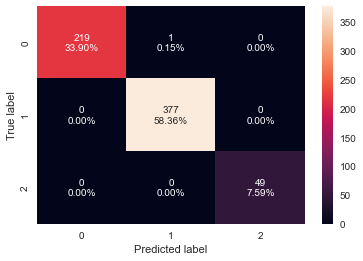

<IPython.core.display.Javascript object>

In [106]:
confusion_matrix_piped(y_train, y_pred_train)

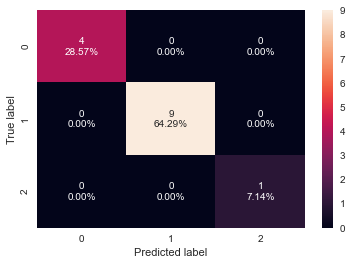

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_piped(y_test, y_pred)

In [108]:
y_pred_2 = classifier.predict(X_test_2)  # For new test set created

<IPython.core.display.Javascript object>

In [109]:
print(y_pred)

[1 1 1 0 1 1 2 0 0 0 1 1 1 1]


<IPython.core.display.Javascript object>

In [110]:
print(y_pred_2)

[1 1 1 1 1 1 1 1 1 2 1 0 0]


<IPython.core.display.Javascript object>

In [111]:
df_trial_2 = df_trial.copy()

<IPython.core.display.Javascript object>

In [112]:
df_trial_2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,65000,7,3,2,3
1,30000,9,6,1,6
2,80000,2,9,10,8
3,12000,5,3,1,2
4,60000,4,5,5,5
5,67000,6,4,4,4
6,3000,8,6,6,6
7,23000,3,5,4,5
8,45000,5,8,3,9
9,100000,9,1,6,10


<IPython.core.display.Javascript object>

In [113]:
df_trial_2["Cluster"] = y_pred_2

<IPython.core.display.Javascript object>

In [114]:
df_trial_2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,65000,7,3,2,3,1
1,30000,9,6,1,6,1
2,80000,2,9,10,8,1
3,12000,5,3,1,2,1
4,60000,4,5,5,5,1
5,67000,6,4,4,4,1
6,3000,8,6,6,6,1
7,23000,3,5,4,5,1
8,45000,5,8,3,9,1
9,100000,9,1,6,10,2


<IPython.core.display.Javascript object>

In [115]:
cluster_profile_trial = df_trial_2.groupby("Cluster").mean()

<IPython.core.display.Javascript object>

In [116]:
cluster_profile_trial["count_in_each_segments"] = (
    df_trial_2.groupby("Cluster")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [117]:
cluster_profile_trial

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
Cluster,,,,,,
0,750.0,1.5,1.5,3.5,8.5,2
1,40530.0,5.6,5.3,4.4,5.0,10
2,100000.0,9.0,1.0,6.0,10.0,1


<IPython.core.display.Javascript object>

In [118]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

In [119]:
cluster_profile_trial.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
Cluster,,,,,,
0,750.000000,1.500000,1.500000,3.500000,8.500000,2
1,40530.000000,5.600000,5.300000,4.400000,5.000000,10
2,100000.000000,9.000000,1.000000,6.000000,10.000000,1


<IPython.core.display.Javascript object>

**The highlighted values on the average confirm that:**
* Cluster 0 has high total calls made yearly.
* Cluster 1 has high physical visits to the bank yearly.
* Cluster 2 has high average credit limit, high number of credit cards, and high total visits online yearly. 
* However, Cluster 2 assigned a high total calls made (10) instead of low. This is because only 3 clusters are available and most of the features fell in cluster 2. If there were more clusters it would have assigned more aptly.

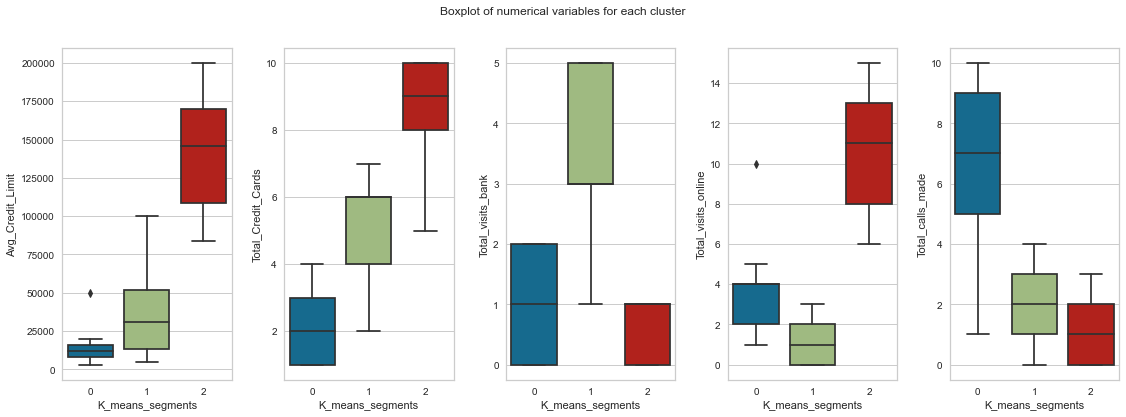

<IPython.core.display.Javascript object>

In [120]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data1[num_col[counter]], x=data1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


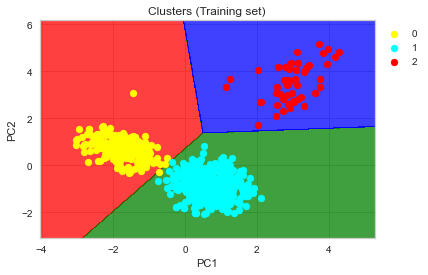

<IPython.core.display.Javascript object>

In [121]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green", "blue")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("yellow", "cyan", "red"))(i),
        label=j,
    )
plt.title("Clusters (Training set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
# plt.legend()
plt.show()

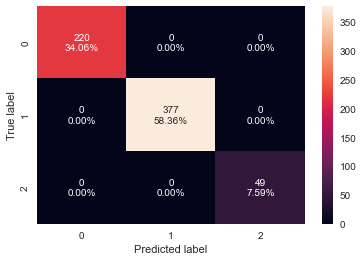

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_piped(y_train, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


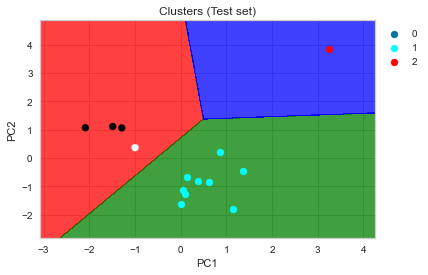

<IPython.core.display.Javascript object>

In [123]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green", "blue")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("yellow", "cyan", "red"))(i),
        label=j,
    )
plt.title("Clusters (Test set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.legend()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

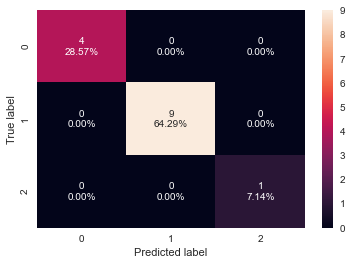

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_piped(y_test, y_pred)

# For the newly formed dataframe

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


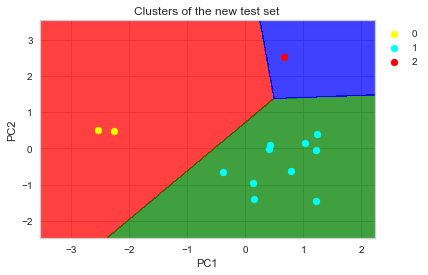

<IPython.core.display.Javascript object>

In [125]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test_2, y_pred_2
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green", "blue")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("yellow", "cyan", "red"))(i),
        label=j,
    )
plt.title("Clusters of the new test set")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.legend()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Actionable Insights 

* At least 50% of the customers have average credit limit of 20000.
* At least 50% of the customers have 4 to 5 total credit cards.
* At least 50% of the customers visit the bank 2 times yearly.
* At least 50% of the customers access the bank online 2 times yearly.
* At least 50% of the customers make calls to the bank 3 times yearly.
* There is a positive correlation between Average credit limit and Total credit cards, Total visits online. So, the higher average credit limit, the more total credit cards and total visits online.
* There is a negative correlation between total credit cards and total calls made. The higher total credit cards the less calls made as there are alternative credit cards to use and less need to call.
* There is a negative correlation between total visits to bank and total visits online, total calls made. The more physical visits to the bank, the less online or phone communications.

**Cluster 0:**
* Average credit limit below 25000 (median: 12500) - So, low average credit limit.
* Total credit cards between 1 and 4 (median: 2) - Low number of credit cards.
* Total physical visits to bank between 0 and 2 (median: 1)- Low physical visit to the bank.
* Total visits online between 1 and 5 (median: 2-4) - Moderate online visits.
* Total calls made between 1 and 10 (median: 7) - High amount of calls made.

* Cluster 0 appears to be customers that are busy in their workplace or at home and hardly visit the bank. More like low income employees in the office mostly kept busy by their bosses, while the bosses might be free to go out as many times as they want or start-up businesses. This set of customers are proficient with the IT and online interaction. 

**Cluster 1**
* Average credit limit between 5000 and 100000 (median: 30000) - Moderate.
* Total credit cards between 2 and 7 (median: 4 - 6) - Moderate.
* Total physical visits to bank between 1 and 5 (median: 3 - 5 ) - High.
* Total visits online between 0 and 3 (median: 1) - Low.
* Total calls made between 0 and 4 (median: 2) - Low.

* Appears to be customers that have the flexibility to visit the bank physically. These set are not very proficient with online interaction and IT. So, they prefer to visit the bank probably by taking excuses from the office once in a while. They could be the bosses in the office, engaging their junior colleagues in the office while they step out to the bank. They could also be elderly people or have little or no education and prefer to speak to bank staff physically.

**Cluster 2**
* Average credit limit between 80000 and 200000 (median: 145000) - High.
* Total credit cards between 5 and 10 (median: 9) - High.
* Total physical visits to bank between 0 and 1 (median: 0 - 1) - Low.
* Total visits online between 6 and 15 (median: 11) - High.
* Total calls made between 0 and 3 (median: 1) - Low.

* Appears to be customers that have high credit limit. This set is very proficient with online interaction and IT. So, they hardly visit the bank physically or call. Instead, most of their interations are done online by logging into their accounts. They are probably self-employed and busy in their offices developing products and services or work offshores or construction sites where calls may not be permitted. They could also be customers that have good jobs abroad and within a different time zone. So, they prefer to login or chat the bank online.


**K-Means**
* There are 224 observations in Cluster 0.
* There are 386 observations in Cluster 1.
* There are 50 observations in Cluster 2.

**Hierarchical**
* There are 225 observations in Cluster 0.
* There are 385 observations in Cluster 1.
* There are 50 observations in Cluster 2.

**The only difference in the clusters is that an observation in cluster 1 for K-Means was assigned to Cluster 0 in Hierarchical clustering**

**Overall:**
* Cluster 0 has high total calls made yearly.
* Cluster 1 has high physical visits to the bank yearly.
* Cluster 2 has high average credit limit, high number of credit cards, and high total visits online yearly. 


**Performance of the Logistic Regression Model on original test set is 100%. So, the model is not overfitting**

**The model performance on a new test set created during production confirms that:**
* Cluster 0 has high total calls made yearly.
* Cluster 1 has high physical visits to the bank yearly.
* Cluster 2 has high average credit limit, high number of credit cards, and high total visits online yearly. 
* However, Cluster 2 assigned a high total calls made (10) instead of low. This is because only 3 clusters are available and most of the features of the observation fell in cluster 2. If there were more clusters it would have assigned more aptly.

# Recommendations


* Cluster 0 appears to be customers that are busy in their workplace or at home and hardly visit the bank. More like low income employees in the office mostly kept busy by their bosses, while the bosses might be free to go out as many times as they want or start-up businesses. This set of customers are proficient with the IT and online interaction. So, the bank should create a better and smoother call system for the this set of customers. If possible, create a good customer system and 24 hour customer service to respond to the customers promptly and resolve their problems aptly. Also, multiple phone contacts of the bank should be made available to the customers to minimize the possibility of busy lines. Furthermore, the internet service in the bank should be strong enough to enable smooth communication with the customers. In fact, the bank could provide internet service which customers could pay for and use, to ensure both the customers and the bank have similar network to avoid competition with the network providers that could limit calls going through smoothly. The bank should provide different schemes to improve their credit limit to encourage the customers.

* Cluster 1 appears to be customers that have the flexibility to visit the bank physically. These set are not very proficient with online interaction and IT. So, they prefer to visit the bank probably by taking excuses from the office once in a while. They could be the bosses in the office, engaging their junior colleagues in the office while they step out to the bank. They could also be elderly people or have little or no education and prefer to speak to bank staff physically. Thus, the bank should provide an attractive and environmental-friendly space to customers. The bank should provide adequate parking space for customers including the disabled. In addition, the bank should have adequately trained customer (facing) service staff to welcome, speak politely, and resolve issues the customers have. Furthermore, the bank should provide pen, adequate personal protective equipment like face masks for customers to use when they visit the bank. The bank should provide different schemes to improve their credit limit to encourage the customers.


* Cluster 2 appears to be customers that have high credit limit. This set is very proficient with online interaction and IT. So, they hardly visit the bank physically or call. Instead, most of their interations are done online by logging into their accounts. They are probably self-employed and busy in their offices developing products and services or work offshores or construction sites where calls may not be permitted. They could also be customers that have good jobs abroad and within a different time zone. So, they prefer to login or chat the bank online. So, the bank should take this segment of customers personal. Customised services should be offered to these customers as they will hardly come physically or make calls to the bank. A good financial officer and a reputable staff should be provided to communicate smoothly with the customers on a personal and customised note to meet the personal needs of the customers as they relate with the bank. The bank should ensure their internet service is strong enough to receive the customers' requests and respond aptly. The bank should be available on different monitored and managed Social Media platforms like WhatsApp, Facebook, Instagram, etc. where this set of customers can reach them should the login platform of the bank fails, they can advise promptly. 

* More clusters probably up to 5 should be created (as more clusters might be difficult to properly target customers) for production to reduce the chance of observations wrongly assigned as there might not be other possible options. In the case of very few clusters like 3, most of the features of the observation might fall into a particular cluster and no suitable cluster to match all the features on the average. In that case there might be wrong cluster assignment. For instance, Cluster 2 assigned a high total calls made (10) instead of low. This is because only 3 clusters are available and most of the features of the observation fell in cluster 2. If there were more clusters it would have assigned more aptly.